# Farouq El-Abbass (49412)

# Advanced Data Analysis - Assignment 3

This notebook contains the **Assignment 3** of the Advanced Data Analysis course.


### DEADLINE: 14-November-2021

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* You don't need to create additional cells. Try to use the ones that are already available
* The notebook should be delivered with the outputs already available


In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

spark = SparkSession.builder \
    .master("local") \
    .appName("Simple test") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .getOrCreate()

fileName = "breastcancer.csv"

# Group I 

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class means whether a patient has breast cancer or not. The two categories are: malignant and benign.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).


## Question 1 (1 point out of 20)

Load the breast cancer dataset using Spark.

In [3]:
breastDF = spark.read.option("header", True).option("inferSchema",True).csv("breastcancer.csv")
breastDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radi

## Question 2 ( 3 points out of 20)

Using Spark SQL, compute the average perimeter of each type of tumor diagnosis. To do this, first you have to register df as a SQL temporary view

In [95]:
breastDF.createOrReplaceTempView("breastDF")
spark.sql("""SELECT diagnosis, AVG(perimeter_mean) FROM breastDF GROUP BY(diagnosis)""").show()

+---------+-------------------+
|diagnosis|avg(perimeter_mean)|
+---------+-------------------+
|        B|  78.07540616246497|
|        M| 115.36537735849062|
+---------+-------------------+



## Question 3 ( 7 points out of 20)

Project the thirty-dimensional Breast Cancer data to two-dimensional principal components. Use PCA and tSNE approaches. For each approach plot the result and then compare them.

Hint: Start by converting the data from Spark into a Pandas DataFrame

Additionally help: 
For this dataset, it is important to normalize the input features but this topic was not discuss in class. 

To do so, before applying the fit_transform function run this piece of code: 

features = StandardScaler().fit_transform(features). (replace features by the name of your variable)

In [96]:
bzazl = breastDF.toPandas()
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
plt.style.use('seaborn') 
bzazl

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Text(0.5, 1.0, 'PCA')

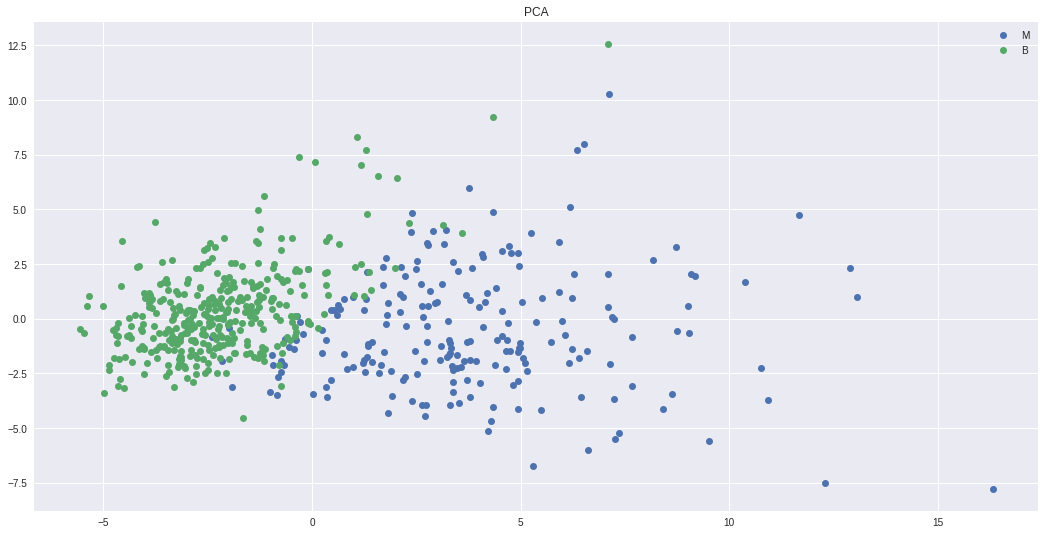

In [149]:
features = bzazl.iloc[:,2:].values
features = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
red = pca.fit_transform(features)
plt.figure(figsize=(18,9))
for tumors in bzazl["diagnosis"].unique():
    mask = bzazl["diagnosis"] == tumors
    plt.plot(red[mask, 0], red[mask, 1], 'o', label=tumors)
plt.legend()
plt.title("PCA")

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE')

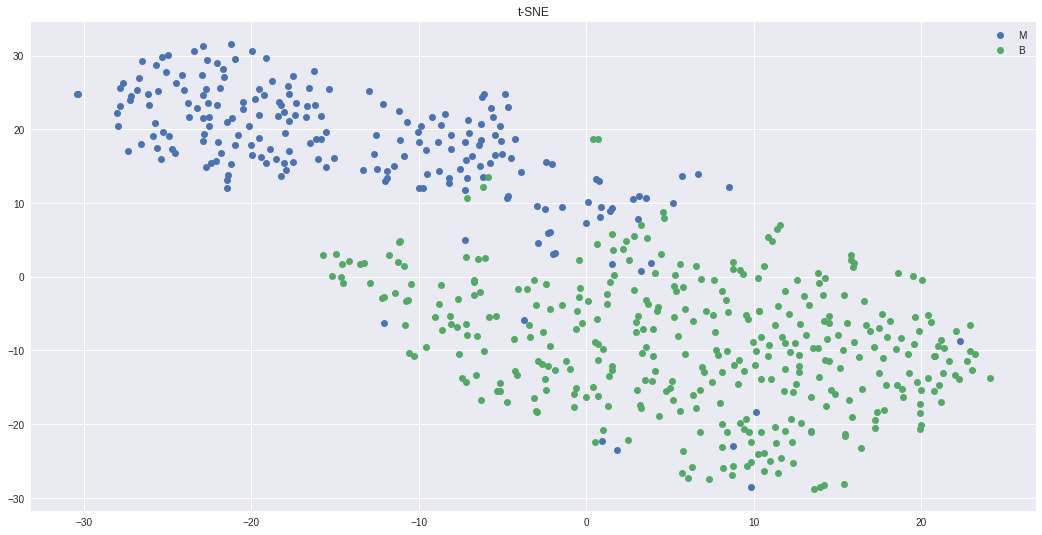

In [39]:
tsne = TSNE(n_components=2)
redd = tsne.fit_transform(features)
plt.figure(figsize=(18,9))
for tumors in bzazl["diagnosis"].unique():
    mask = bzazl["diagnosis"] == tumors
    plt.plot(redd[mask, 0], redd[mask, 1], 'o', label=tumors)
plt.legend()
plt.title("t-SNE")

## Question 4 ( 1 points out of 20)

What can you tell about the two types of tumors? Are they easily differentiated by the features computed from a digitized image? Why?

_**The two types of tumors are easily diffentiated. After doing the PCA and t-SNE, we see that we have two different clusters that we can separate easily, especially for the PCA, we have the Benign tumor concentrated in one set of observations, and the rest that is not in that cluster, by inference, will of course be the malign ones. In addition to that, we can easily discriminate the clusters.**_

# Group II

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012. For answering the following questions, you can use or adapt any code from the lectures or exercises
if you want.


In [42]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = "internet.csv"
dataDF = pd.read_csv(dataFileName)

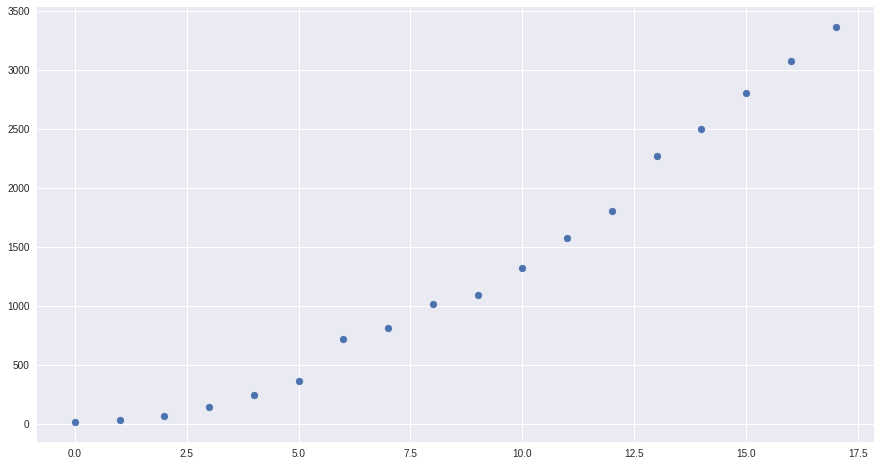

In [84]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF.index
dataset_df['n_users'] = dataDF['n_users']
plt.figure(figsize=(15,8))
plt.scatter(dataset_df["year"], dataset_df["n_users"])

## Question 1 (6 points out of 20)

In lecture 6, we used this modified logistic function adding an offset parameter to better fit the curve to some arbitrary starting point:

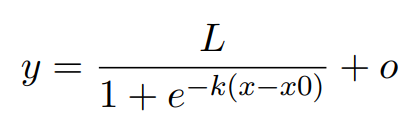

Fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, display the parameters found for the logistic model. 

Note: I suggest you use these starting values for the minimization: L = 1000, x0 = 10, k = 0.1 and
o = −300. If you use other values the minimization may not converge properly. Also it may happen that you get
some warnings during the minimization, but if the result seems OK don’t worry.


Parameters: x0:  15.221023835782155 , L:  6462.124514388908 , k:  0.1887175472868078 , Offset:  -384.7186408120653


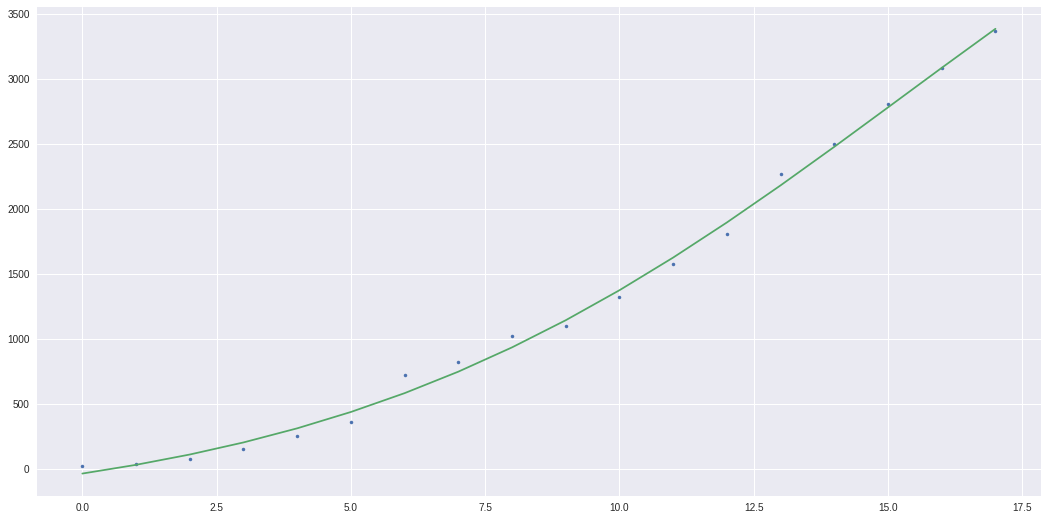

In [85]:
from scipy.optimize import minimize 
import numpy as np
def logistic(x,x0,L,k):
    return L/(1 + np.exp(-k*(x-x0)))
def log_cost(params, data):
    x0,L,k,offset = params
    pred = logistic(data.iloc[:,0],x0,L,k) + offset
    return np.mean( (pred-data.iloc[:,1])**2)
st_params = [10, 1000, 0.1, -300]
plt.figure(figsize=(18,9))
res=minimize(log_cost,st_params,args=(dataset_df))
x0,L,k,offset = res.x
pred = logistic(dataset_df.iloc[:,0],x0,L,k) + offset
plt.plot(dataset_df.iloc[:,0],dataset_df.iloc[:,1],'.')
plt.plot(dataset_df.iloc[:,0],pred)
print("Parameters:", "x0: ", x0, ", L: ", L, ", k: ", k, ", Offset: ", offset)

## Question 2 (2 points out of 20)

Compute and plot the residuals of the model found. What can we tell about the model identified based on the Residual Plot? 

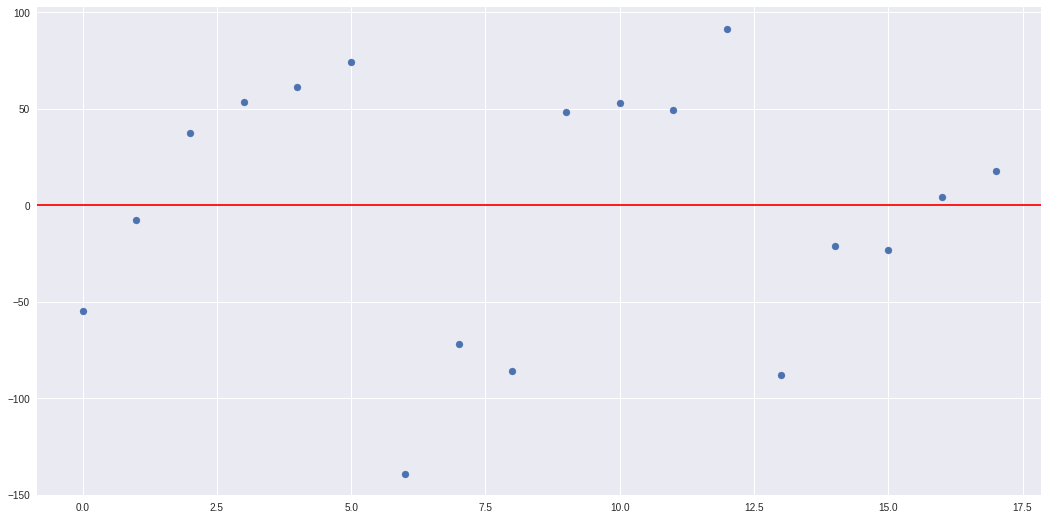

In [94]:
res = pred - dataset_df.iloc[:,1]
plt.figure(figsize=(18,9))
plt.scatter(dataset_df.iloc[:,0],res)
plt.axhline(y=res.mean(), color='r', linestyle='-')

_**After plotting the residuals of the model trained by a logistic regression against the years, we can notice that the values are spread around the mean which is very closer to 0. It is expected that the variance of the residuals is equal to zero, which means that our model is correctly fitted.**_